In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

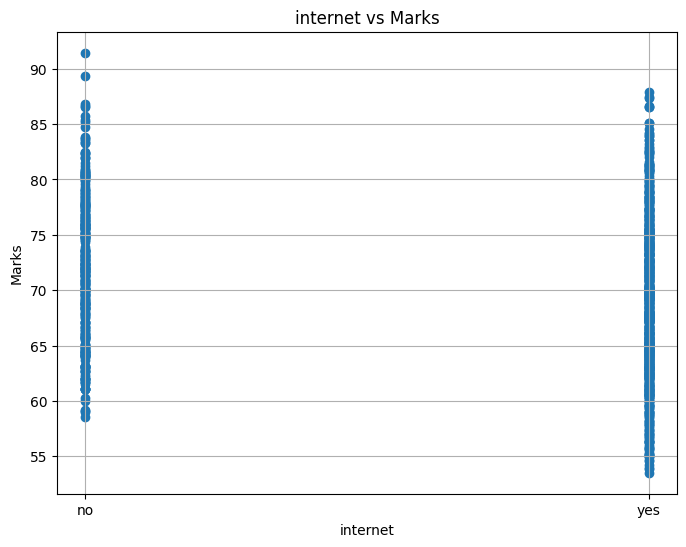

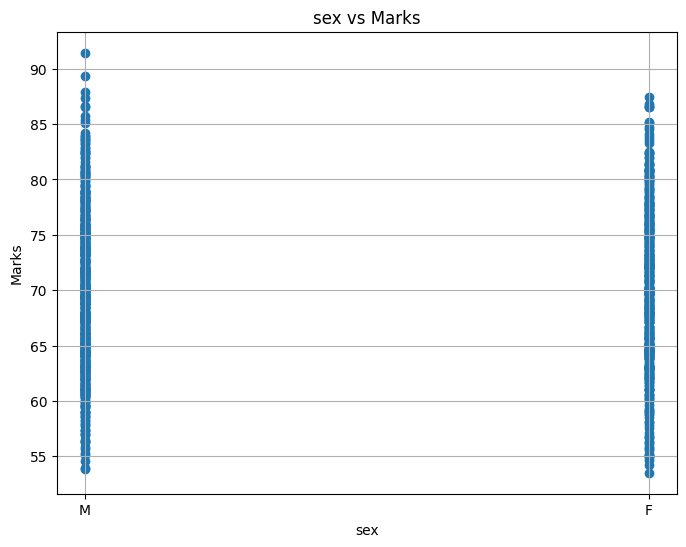

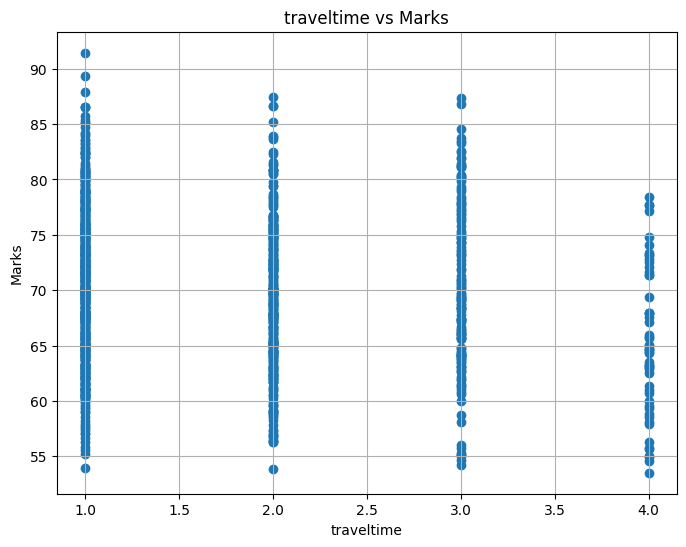

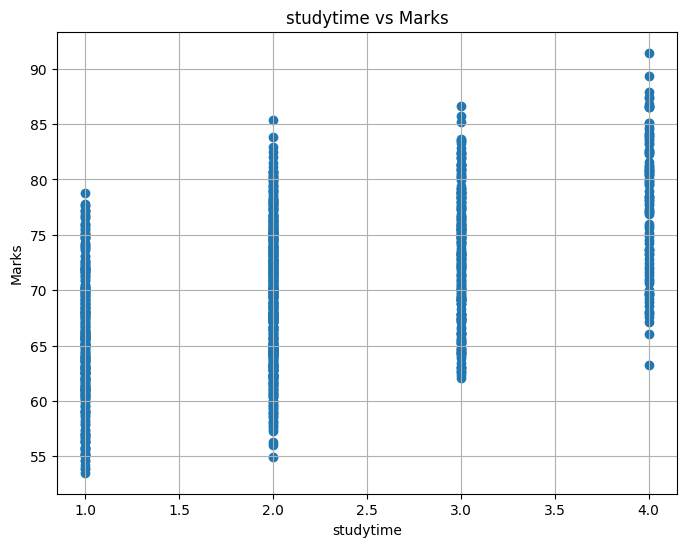

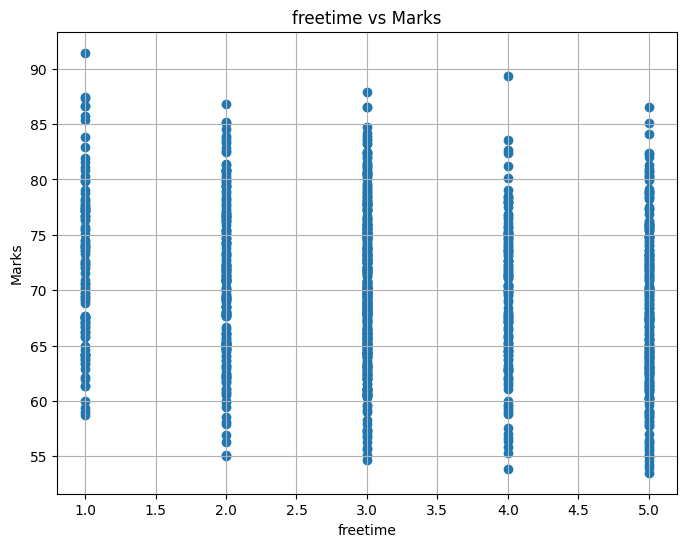

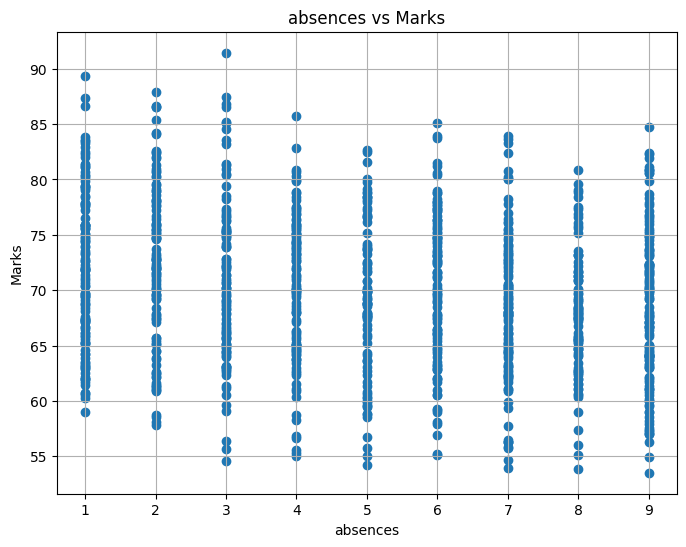

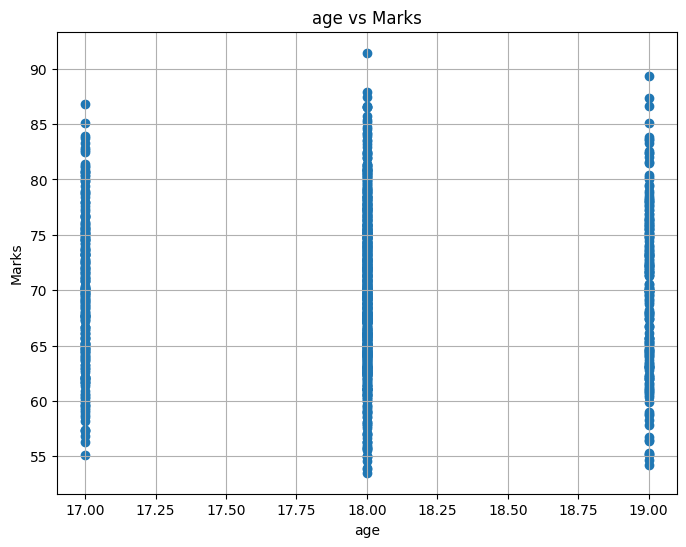

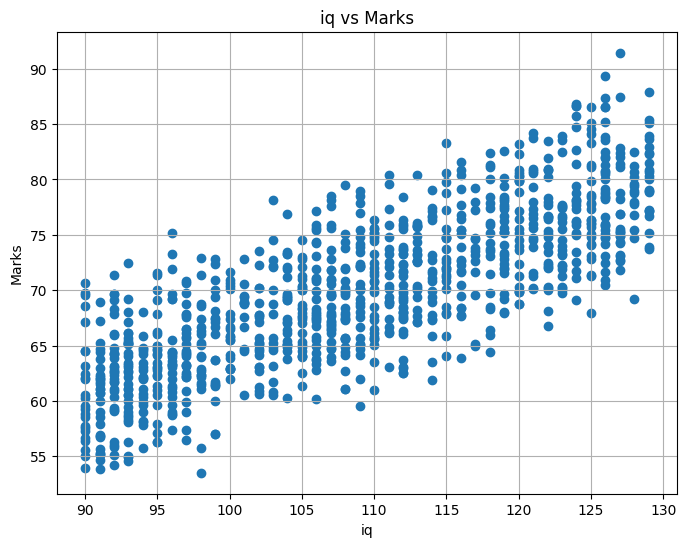

In [85]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)


# Try plotting y_train with different features
# To get an idea whether to add some features or not
for i in range(8):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_train[:, i], y_train)
    plt.xlabel(data.columns[i])
    plt.ylabel('Marks')
    plt.title(f'{data.columns[i]} vs Marks')
    plt.grid(True)
    plt.show()
  
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers

# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
    # Your code here
  x_train[:,0] = [{'no' : 0, 'yes' : 1}[i] for i in x_train[:,0]]
  x_train[:,1] = [{'F' : 0, 'M' : 1}[i] for i in x_train[:,1]]
  new_feature = x_train[:, 3] * x_train[:, 7] / (np.mean(x_train[:, 3]) * np.mean(x_train[:, 7]))
  new_feature = new_feature.reshape(-1, 1)
  x_train = np.concatenate((x_train, new_feature), axis=1)
  # ---------
  return x_train

x_train = feature_changing(x_train)

In [86]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
  # ---------

    return x_train,x_std,x_mean


In [87]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    y_out = np.dot(w.T , x_train.T) + b
    loss = np.sum((y_out - y_train)**2)/(y_train.shape[0])
    # Use mean square error as cost function
    # return cost
  # ---------

    return loss

In [88]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    lr = 0.05
    itr = 2000
    m = y_train.shape[0]
    for i in range(itr):
        y_out = np.dot(w.T , x_train.T) + b
        dw = (2/m)*np.dot(x_train.T , y_out.T-y_train)
        db = (1/m)*np.sum(y_out-y_train.T)
        w -= lr * dw
        b -= lr * db
    # Choose learning rate yourself
  # ---------

    return w,b

In [89]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5:
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
